In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive',force_remount=True)


Mounted at /content/drive


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [18]:
# Set directory paths
train_dir = '/content/drive/MyDrive/soil-data/train'
#test_dir = '/content/drive/MyDrive/men-women-data/test'

# Preprocess images
train_datagen = ImageDataGenerator(rescale=1./255)
#test_datagen = ImageDataGenerator(rescale=1./255)

img_size = (150, 150)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)




Found 6 images belonging to 6 classes.


In [32]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    '/content/drive/MyDrive/soil-data/train',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Extract class labels
class_labels = list(train_data.class_indices.keys())
print("Class Labels:", class_labels)


Found 6 images belonging to 6 classes.
Class Labels: ['allu', 'black', 'desert', 'later', 'mountain', 'red']


In [19]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),      # Hidden layer 1
    Dense(32, activation='relu'),      # Hidden layer 2
    Dense(6, activation='softmax')

])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',   # or 'sparse_categorical_crossentropy'
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,838,886 (18.46 MB)

 Trainable params: 4,838,886 (18.46 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
history = model.fit(
    train_generator,
    epochs=10,
    #validation_data=test_generator
)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.1667 - loss: 1.8169
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - accuracy: 0.1667 - loss: 1.8944
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.1667 - loss: 1.8796
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.1667 - loss: 2.0428
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.1667 - loss: 1.8551
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step - accuracy: 0.3333 - loss: 1.7763
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step - accuracy: 0.3333 - loss: 1.7305
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step - accuracy: 0.0000e+00 - loss: 1.8424
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step - accuracy: 0.3333 - loss: 1.6630
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.3333 - loss: 1.6780


In [28]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = '/content/drive/MyDrive/soil-data/train/black/black.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img) / 255.0
img_tensor = np.expand_dims(img_tensor, axis=0)

prediction = model.predict(img_tensor)
print(prediction )


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
[[0.18201387 0.21746178 0.11852501 0.11691498 0.16074343 0.20434092]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
[[0.1790682  0.15930878 0.08761185 0.0713544  0.11464456 0.38801226]]


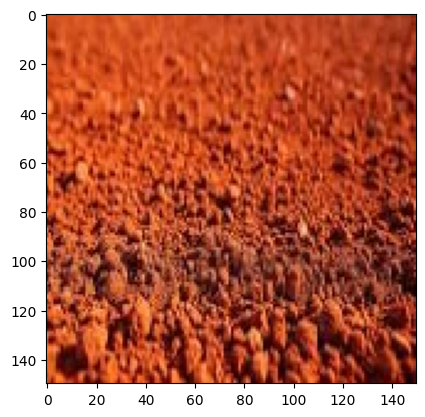

In [36]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
IMG_HEIGHT = 150
IMG_WIDTH = 150

# Load an image for prediction
img_path = '/content/drive/MyDrive/soil-data/train/red/red.jpg'
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_array)

print(prediction)

# Display the image
plt.imshow(img)
plt.show()

In [37]:
import numpy as np

# Your model prediction output
prediction = np.array([[0.1790682, 0.15930878, 0.08761185, 0.0713544, 0.11464456, 0.38801226]])

# Get index of maximum value
max_index = np.argmax(prediction)

# Get maximum value
max_value = prediction[0][max_index]

# Get class labels (from training data)
class_labels = list(train_data.class_indices.keys())

# Get predicted label
predicted_label = class_labels[max_index]

print(predicted_label)


red


In [38]:
if predicted_label=="red":
  print("Groundnut, Millets, Pulses, Cotton, Wheat, Oilseeds")

Groundnut, Millets, Pulses, Cotton, Wheat, Oilseeds
